Missing values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Weight (w): 49.32464464492299
Bias (b): 250.0587179275352
R2 Score: 0.6961332968559221


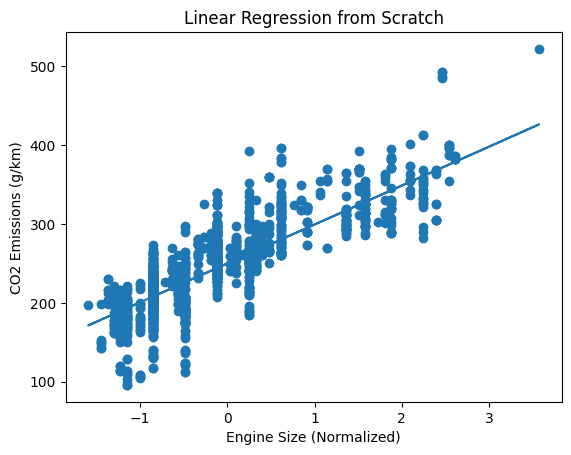

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. Load the dataset
# =========================
df = pd.read_csv("co2.csv")

# =========================
# 2. Check missing values
# =========================
print("Missing values:\n", df.isnull().sum())

# =========================
# 3. Select feature and target
# =========================
X = df["Engine Size(L)"].values
y = df["CO2 Emissions(g/km)"].values

# =========================
# 4. Normalize the feature
# =========================
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

# =========================
# 5. Train–Test Split (80–20)
# =========================
split_index = int(0.8 * len(X))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

# =========================
# 6. Initialize parameters
# =========================
w = 0
b = 0
alpha = 0.01
epochs = 1000
n = len(X_train)

# =========================
# 7. Gradient Descent
# =========================
for i in range(epochs):
    y_pred = w * X_train + b

    dw = (1/n) * np.sum((y_pred - y_train) * X_train)
    db = (1/n) * np.sum(y_pred - y_train)

    w = w - alpha * dw
    b = b - alpha * db

# =========================
# 8. Predictions on test data
# =========================
y_test_pred = w * X_test + b

# =========================
# 9. R2 Score calculation
# =========================
ss_total = np.sum((y_test - y_test.mean()) ** 2)
ss_residual = np.sum((y_test - y_test_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("Weight (w):", w)
print("Bias (b):", b)
print("R2 Score:", r2)

# =========================
# 10. Plot regression result
# =========================
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred)
plt.xlabel("Engine Size (Normalized)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Linear Regression from Scratch")
plt.show()